# Filters visualisation with matplotlib in Keras

In [8]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from keras import backend as K
import math
import keras.callbacks

print(keras.__version__)

2.0.5


In [9]:
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
# The below code is for Jetson. Without it has SSL Certificate error.

#import ssl
# This restores the same behavior as before.
#ssl._create_default_https_context = ssl._create_unverified_context

# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

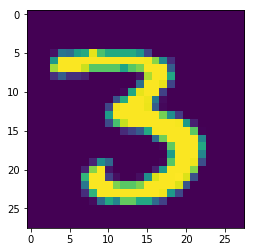

In [11]:
plt.imshow(X_train[12])

In [12]:
# Change shape
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# Convert to float32 and normalise to range [0,1]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [31]:
model = None
model = Sequential()
 
model.add(Conv2D(32, (3, 3), data_format="channels_first", activation='tanh', input_shape=(1,28,28)))
model.add(Conv2D(32, (3, 3)))
model.add(Activation(K.tanh))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [32]:
model.summary()
print model.output_shape

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 26, 26)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 24, 32)        7520      
_________________________________________________________________
activation_4 (Activation)    (None, 30, 24, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 12, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 15, 12, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5760)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               737408    
__________

In [33]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [19]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 249s - loss: 0.2295 - acc: 0.9304   
Epoch 2/10
60000/60000 [==============================] - 246s - loss: 0.1022 - acc: 0.9694   
Epoch 3/10
60000/60000 [==============================] - 247s - loss: 0.0808 - acc: 0.9751   
Epoch 4/10
60000/60000 [==============================] - 251s - loss: 0.0695 - acc: 0.9786   
Epoch 5/10
60000/60000 [==============================] - 253s - loss: 0.0666 - acc: 0.9797   
Epoch 6/10
60000/60000 [==============================] - 252s - loss: 0.0600 - acc: 0.9821   
Epoch 7/10
60000/60000 [==============================] - 247s - loss: 0.0546 - acc: 0.9833   
Epoch 8/10
60000/60000 [==============================] - 246s - loss: 0.0506 - acc: 0.9848   
Epoch 9/10
60000/60000 [==============================] - 245s - loss: 0.0522 - acc: 0.9847   
Epoch 10/10
60000/60000 [==============================] - 246s - loss: 0.0477 - acc: 0.9854   


In [20]:
score = model.evaluate(X_test, Y_test, verbose=1)
print score

 9984/10000 [============================>.] - ETA: 0s[0.033523569321696776, 0.98999999999999999]


In [18]:
# Export model
#json_string = model.to_json()
#open('my_model_architecture.json', 'w').write(json_string)

yaml_string = model.to_yaml()
open('my_model_architecture.yml', 'w').write(yaml_string)


In [21]:
#model.save_weights('my_model_weights.h5')

ImportError: `save_weights` requires h5py.

### Visualise filters

https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html

In [22]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [23]:
print layer_dict

{'flatten_3': <keras.layers.core.Flatten object at 0x7fd63602b210>, 'activation_3': <keras.layers.core.Activation object at 0x7fd636066410>, 'dense_6': <keras.layers.core.Dense object at 0x7fd635ff37d0>, 'dense_5': <keras.layers.core.Dense object at 0x7fd63602b750>, 'max_pooling2d_3': <keras.layers.pooling.MaxPooling2D object at 0x7fd63601a690>, 'dropout_5': <keras.layers.core.Dropout object at 0x7fd636278d50>, 'dropout_6': <keras.layers.core.Dropout object at 0x7fd63602b190>, 'conv2d_5': <keras.layers.convolutional.Conv2D object at 0x7fd636066910>, 'conv2d_6': <keras.layers.convolutional.Conv2D object at 0x7fd63607a3d0>}


*Ref.: Keras model https://keras.io/models/model/*

model.inputs – list of input tensors

In [80]:
def get_layer_outputs(layer_name, input_img_data):
    layer_dict = dict([(layer.name, layer) for layer in model.layers])
    layer_output = layer_dict[layer_name].output
    layer_f = K.function(model.inputs, [layer_output])
    outputs = np.asarray(layer_f([[input_img_data]]), dtype=np.float32)[0][0]
    return outputs

def get_layer_filters(layer_name):
    layer_dict = dict([(layer.name, layer) for layer in model.layers])
    filters = layer_dict[layer_name].output[0]
    print "Filters:", filters
    return filters

Filters: Tensor("strided_slice_6:0", shape=(32, 26, 26), dtype=float32)
<class 'tensorflow.python.framework.ops.Tensor'>
(32, 26, 26)


TypeError: 'Tensor' object is not iterable.

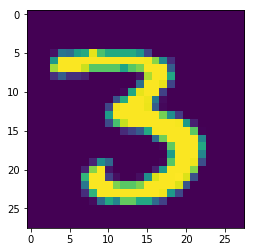

In [82]:
fig = plt.figure()
#print X_train[12,0].shape
plt.imshow(X_train[12,0])

filters = get_layer_filters("conv2d_7")
print type(filters)
print filters.shape
in_row = 8.
fshape = float(x)
rows = math.ceil(fshape/in_row)

fig = plt.figure()
i = 0
for filter_ in filters[0]:
    p=fig.add_subplot(rows,in_row,i+1)
    p.axis('off')
    plt.imshow(filter_, cmap="gray")
    i += 1



In [ ]:
img_index = 9
fig = plt.figure()
plt.imshow(X_train[img_index,0])

filters = get_layer_filters("conv2d_1", X_train[img_index])
fig = plt.figure()
in_row = 8.
rows = math.ceil(filters.shape[0]/in_row)
i = 0
for filter_ in filters:
    p=fig.add_subplot(rows,in_row,i+1)
    p.axis('off')
    plt.imshow(filter_)
    i += 1



In [ ]:
img_index = 9
fig = plt.figure()
plt.imshow(X_train[img_index,0])

filters = get_layer_filters("conv2d_2", X_train[img_index])
fig = plt.figure()
in_row = 6.
rows = math.ceil(filters.shape[0]/in_row)
i = 0
for filter_ in filters:    
    p=fig.add_subplot(rows,in_row,i+1)
    p.axis('off')
    plt.imshow(filter_)
    i += 1




In [ ]:
img_index = 9
fig = plt.figure()
plt.imshow(X_train[img_index,0])

filters = get_layer_filters("max_pooling2d_1", X_train[img_index])
fig = plt.figure()
in_row = 6.
rows = math.ceil(filters.shape[0]/in_row)
i = 0
for filter_ in filters:    
    p=fig.add_subplot(rows,in_row,i+1)
    p.axis('off')
    plt.imshow(filter_)
    i += 1


